In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from imageio import imread, imsave
from skimage.color import rgb2gray
from skimage.feature import plot_matches

### Load and preprocess images

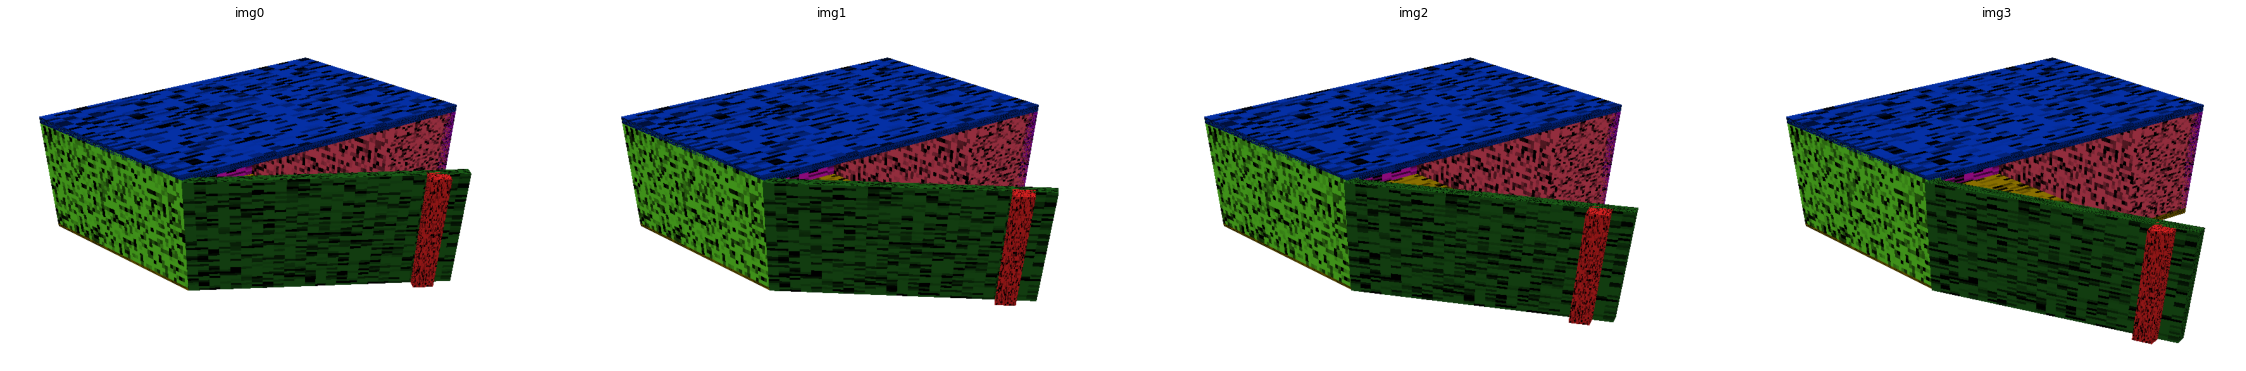

In [17]:
def crop_center(img, h_ratio=0.5, w_ratio=0.4):
    h, w = img.shape[:2]
    return img[int((1 - h_ratio) / 2 * h):int((1 + h_ratio) / 2 * h), int((1 - w_ratio) / 2 * w):int((1 + w_ratio) / 2 * w)]


imgs = [crop_center(imread(f'test/microwave/img{i:06}.png')) for i in range(35, 39)]
plt.figure(figsize=(40, 10))
for i, img in enumerate(imgs):
    plt.subplot(1, 4, i + 1)
    plt.axis('off')
    plt.title(f'img{i}')
    plt.imshow(imgs[i])


In [18]:
# # Convert to grayscale
# imgs = [rgb2gray(img) for img in imgs]
# plt.figure(figsize=(40, 10))
# for i, img in enumerate(imgs):
#     plt.subplot(1, 3, i + 1)
#     plt.imshow(imgs[i], cmap='gray')
#     plt.axis('off')

# Detect features and plot matches

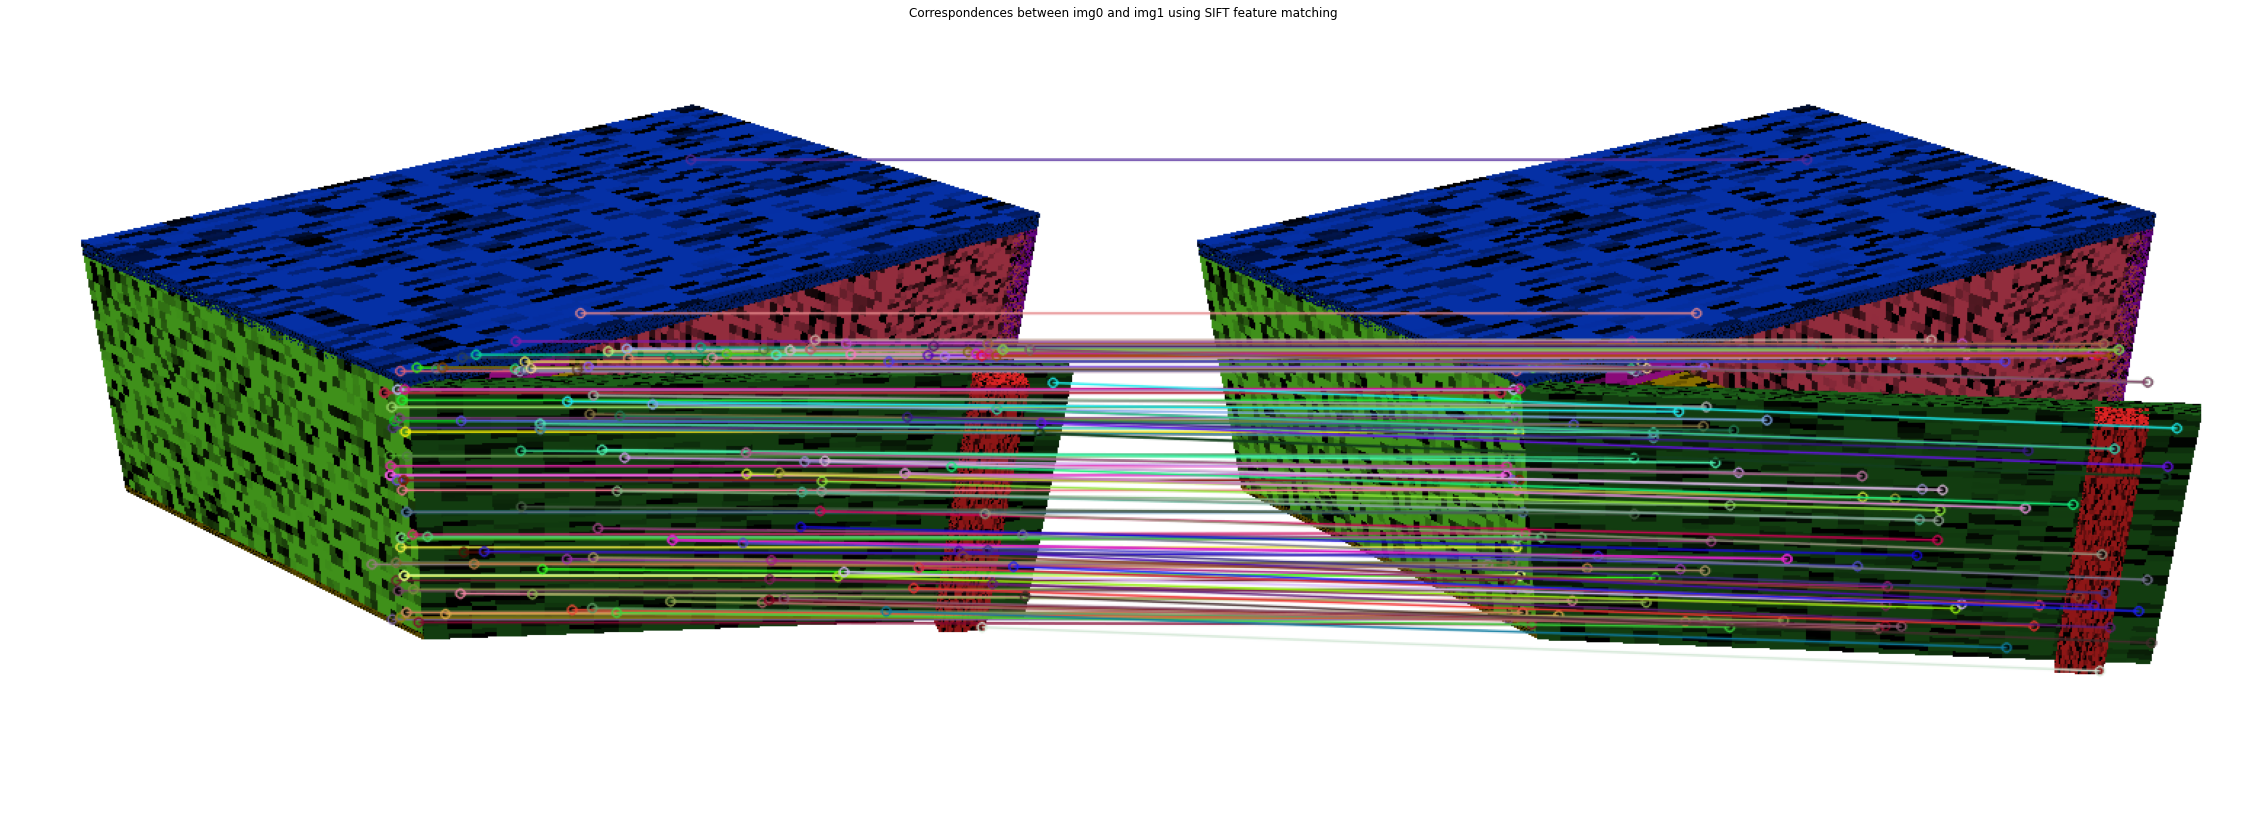

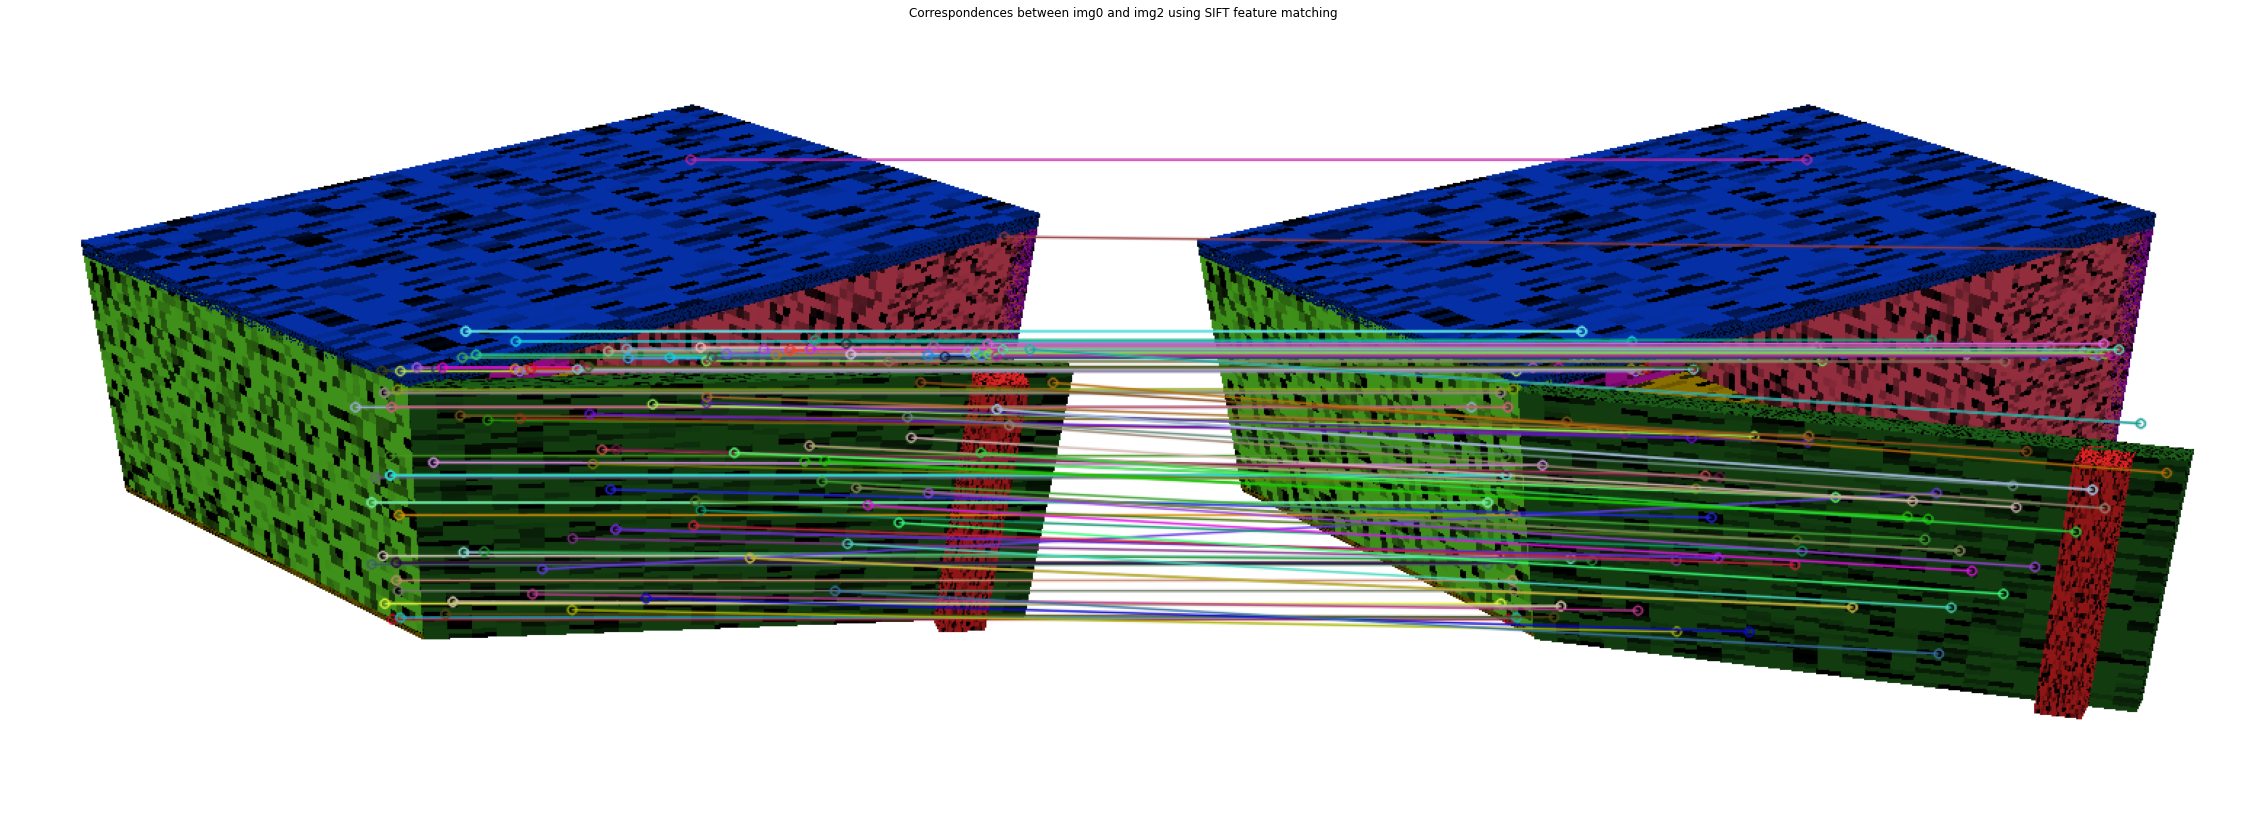

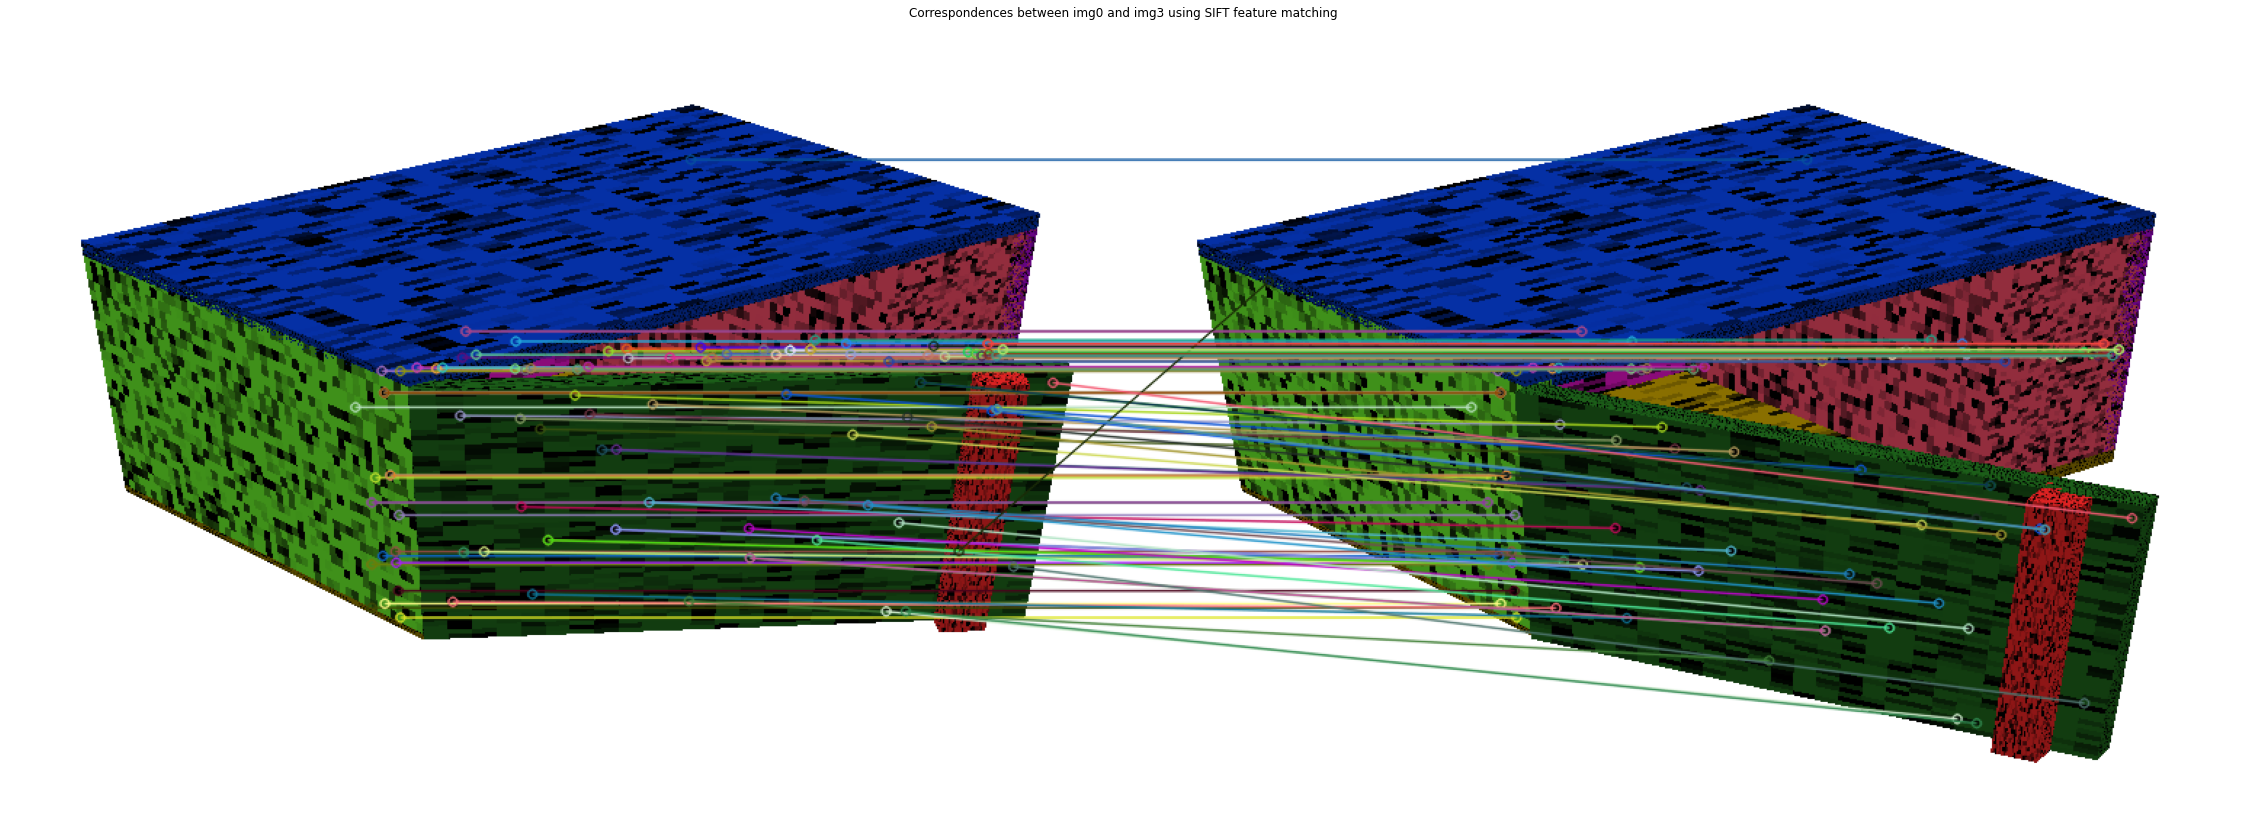

In [19]:
import cv2


def extract_correspondences(im1, im2, feature='sift', coeff=0.7):
    feature_extractor = cv2.SIFT_create() if feature=='sift' else cv2.ORB_create()
    kp1, des1 = feature_extractor.detectAndCompute(im1, None)
    kp2, des2 = feature_extractor.detectAndCompute(im2, None)
    matches = cv2.BFMatcher().knnMatch(des1, des2, k=2)
    matches = [[m] for m, n in matches if 0.1 * n.distance < m.distance < coeff * n.distance]
    pts1 = np.array([kp1[match[0].queryIdx].pt for match in matches])
    pts2 = np.array([kp2[match[0].trainIdx].pt for match in matches])
    return pts1, pts2, matches, kp1, kp2

for i in range(1, len(imgs)):
    _, _, matches_for_plot, kp1, kp2 = extract_correspondences(imgs[0], imgs[i])
    img = cv2.drawMatchesKnn(imgs[0], kp1, imgs[i], kp2, matches_for_plot, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    plt.figure(figsize=(40, 15))
    plt.axis('off')
    plt.title(f'Correspondences between img0 and img{i} using SIFT feature matching')
    plt.imshow(img)
    plt.show()

# pts1, pts2, matches_for_plot, kp1, kp2 = extract_correspondences(imgs[0], imgs[1], feature='orb', coeff=0.9)
# img = cv2.drawMatchesKnn(imgs[0], kp1, imgs[1], kp2, matches_for_plot, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# plt.figure(figsize=(40, 10))
# plt.axis('off')
# plt.title('Correspondences using ORB feature matching')
# plt.imshow(img)
# plt.show()
